In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

dataset = "maternal_hr"

# experiment_path_standard = "experiments/results" 
# experiment_path_evo = "experiments/results" 

In [14]:
#Join all the dataframes
# n_core = os.cpu_count() #Da sostituire con il numero di core usato
# df_evo_V = pd.read_csv(experiment_path_standard + "")
# df_standard = pd.read_csv(experiment_path_evo_V + "")

# for i in range(n_core):
#     df_standard = pd.concat([df_standard, pd.read_csv(experiment_path_standard + "/global_result_0_" + str(i) + ".csv")], ignore_index=True)
#     df_evo_V = pd.concat([df_evo_V, pd.read_csv(experiment_path_evo_V + "/global_result_0_" + str(i) + ".csv")], ignore_index=True)

# df_standard.to_csv(experiment_path_standard + "/global_result.csv", index=False)
# df_evo_V.to_csv(experiment_path_evo_V + "/global_result.csv", index=False)

In [ ]:
#load experiment

# experiment_path_evo_partial = "./data/evo/evolve_partial_architecture/" + dataset

<Axes: xlabel='crossover_rate', ylabel='Test_Acc.'>

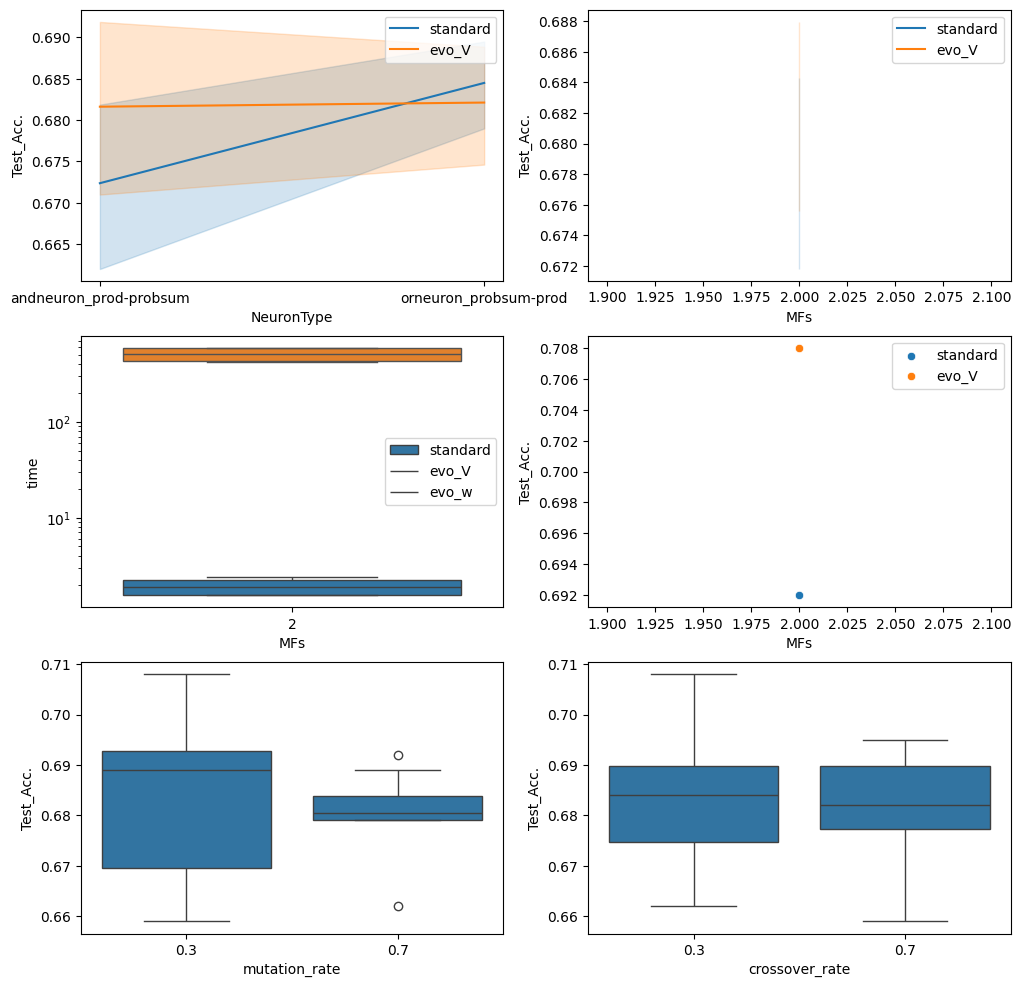

In [4]:
#load the data

global_results_standard = pd.read_csv(dataset + "/no_evoruns_results_0.csv")
global_results_evo_V = pd.read_csv(dataset + "/global_result_V.csv")
# global_results_evo_w = pd.read_csv(dataset + "/global_result_w.csv")


#plot the results
figure1, axs = plt.subplots(3, 2, figsize=(12, 12))
sns.lineplot(data=global_results_standard, x="NeuronType", y="Test_Acc.", label="standard", ax=axs[0,0])
sns.lineplot(data=global_results_evo_V, x="NeuronType", y="Test_Acc.", label="evo_V", ax=axs[0,0])
# sns.lineplot(data=global_results_evo_w, x="NeuronType", y="Test_Acc.", label="evo_w", ax=axs[0,0])

sns.lineplot(data=global_results_standard, x="MFs", y="Test_Acc.", label="standard", ax=axs[0,1], markers="o")
sns.lineplot(data=global_results_evo_V, x="MFs", y="Test_Acc.", label="evo_V", ax=axs[0,1], markers="o")
# sns.lineplot(data=global_results_evo_w, x="MFs", y="Test_Acc.", label="evo_w", ax=axs[0,1], markers="o")


sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==2], x="MFs", y="time", ax=axs[1,0])
sns.boxplot(data=global_results_evo_V[global_results_evo_V["MFs"]==2], x="MFs", y="time",  ax=axs[1,0])
# sns.boxplot(data=global_results_evo_w[global_results_evo_w["MFs"]==2], x="MFs", y="time",  ax=axs[1,0])
axs[1,0].legend(["standard", "evo_V", "evo_w"])
axs[1,0].set_yscale("log")

# sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==3], x="MFs", y="time", ax=axs[1,0])
# sns.boxplot(data=global_results_evo_V[global_results_evo_V["MFs"]==3], x="MFs", y="time",  ax=axs[1,0])
# axs[1,0].legend(["standard", "evo_V", "evo_w"])
# axs[1,0].set_yscale("log")


# sns.boxplot(data=global_results_standard[global_results_standard["MFs"]==2], x="MFs", y="Test_F1", ax=axs[1,1])
# sns.boxplot(data=global_results_evo_V[global_results_evo_V["MFs"]==2], x="MFs", y="Test_F1", ax=axs[1,1])

#Get the best results on the validation set
best_standard = global_results_standard.loc[global_results_standard.groupby("MFs")["Test_Acc."].idxmax()]
best_evo_V = global_results_evo_V.loc[global_results_evo_V.groupby("MFs")["Test_Acc."].idxmax()]
# best_evo_w = global_results_evo_w.loc[global_results_evo_w.groupby("MFs")["Test_Acc."].idxmax()]
sns.scatterplot(data=best_standard, x="MFs", y="Test_Acc.", label="standard", ax=axs[1,1], markers="o")
sns.scatterplot(data=best_evo_V, x="MFs", y="Test_Acc.", label="evo_V", ax=axs[1,1], markers="o")
# sns.scatterplot(data=best_evo_w, x="MFs", y="Test_Acc.", label="evo_w", ax=axs[1,1], markers="o")

sns.boxplot(data=global_results_evo_V, x="mutation_rate", y="Test_Acc.", ax=axs[2,0])
# sns.boxplot(data=global_results_evo_w, x="mutation_rate", y="Test_Acc.", ax=axs[2,0])


sns.boxplot(data=global_results_evo_V, x="crossover_rate", y="Test_Acc.", ax=axs[2,1])
# sns.boxplot(data=global_results_evo_w, x="crossover_rate", y="Test_Acc.", ax=axs[2,1])